<a href="https://colab.research.google.com/github/Anup-Sarkar-DD/GoogleColab_repo/blob/main/DeepLearningLinkedin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbe = LabelEncoder()

y_train=lbe.fit_transform(y_train)
y_test=lbe.transform(y_test)


In [ ]:
x_train = np.array(x_train)
x_test =np.array(x_test)


In [ ]:
# # prompt: quick quesion does iris dataset need encoding if im going to implement ann model?

# Yes, the `species` column in the Iris dataset, which is the target variable `y`, needs to be encoded if you are going to implement an Artificial Neural Network (ANN) model using typical libraries like TensorFlow or PyTorch.

# ANNs work with numerical data. The `species` column contains categorical string values ('setosa', 'versicolor', 'virginica'). You need to convert these categorical labels into a numerical format that the ANN can understand and process.

# Common encoding techniques for the target variable in classification tasks are:

# 1.  **Label Encoding:** Assign a unique integer to each category (e.g., setosa=0, versicolor=1, virginica=2). This is suitable if the ANN architecture expects integer labels for a sparse categorical crossentropy loss function.
# 2.  **One-Hot Encoding:** Convert each category into a binary vector where only one element is 1 and the rest are 0. For example, 'setosa' might become [1, 0, 0], 'versicolor' becomes [0, 1, 0], and 'virginica' becomes [0, 0, 1]. This is typically used when the output layer of the ANN uses a softmax activation and the loss function is categorical crossentropy.

# For the Iris dataset, One-Hot Encoding is a more common and generally recommended approach for ANN classification, especially if using a final softmax layer.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaling  = StandardScaler()
x_train =scaling.fit_transform(x_train)
x_test= scaling.transform(x_test)

In [ ]:
from keras.utils import to_categorical

In [ ]:
#converting array to vector example orignal label 0 but after to_categoriacal >> [1,0,0]
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#number of classes in target versicolor setosa virginica
NB_CLASSES=3

In [ ]:
from os import name
model = Sequential()

#adding the 1st hidden layer
model.add(Dense(
    128,#number of nodes
    input_shape=(4,),#number of features/input variables
    name= 'Hidden-layer-1',
    activation='relu'#activation function
))

#adding 2nd hidden layer
model.add(Dense(
    128,
    name='Hidden-layer-2',
    activation='relu'
))

#adding output layer with softmax
model.add(Dense(
    NB_CLASSES,
    name='output-layer',
    activation = 'softmax'
))

#complie the model with loss and metrics
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#print the model meta-data
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
VERBOSE = 1 #-  Progress bar (default, shows an updating bar for training progress



 Training progress: 
 ----------------
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5996 - loss: 0.8893 - val_accuracy: 0.8333 - val_loss: 0.6822
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8417 - loss: 0.5913 - val_accuracy: 0.8750 - val_loss: 0.5382
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8396 - loss: 0.4723 - val_accuracy: 0.8750 - val_loss: 0.4657
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8295 - loss: 0.4183 - val_accuracy: 0.9167 - val_loss: 0.4160
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8208 - loss: 0.4047 - val_accuracy: 0.9167 - val_loss: 0.3800
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8372 - loss: 0.3408 - val_accuracy: 0.9167 - val_loss: 0.3477
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8820 - loss: 0.3037 - val_accuracy: 0.9167 - val_loss: 0.3286
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9342 - loss: 0.2796 - 

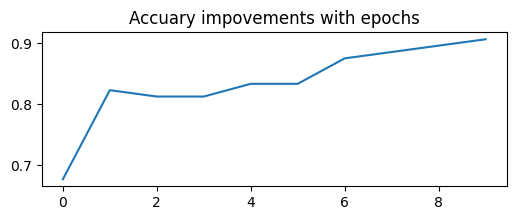


Evaluation against Test Dataset: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9333 - loss: 0.1985


[0.19849252700805664, 0.9333333373069763]

In [ ]:
#set up hyperparameter for training

#set batch size
BATCH_SIZE = 16

#Set number of epoches
EPOCHS = 10

#set validation split . 20% of the training data,  will be used for validation
#after each epoch
VALIDATION_SPLIT = 0.2

print("\n Training progress: \n ----------------")


#fit the model (this will perform the entire training cycle including #forward propagation, Loss computation, backward propagation and gradient descent)

cont1 = model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose = VERBOSE, validation_split = VALIDATION_SPLIT)

#accuary during training
pd.DataFrame(cont1.history)['accuracy'].plot(figsize=(6,2))
plt.title("Accuary impovements with epochs")
plt.show()

#evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset: \n")
model.evaluate(x_test, y_test)




In [ ]:
#model summary

summary =model.summary()






Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,080 (137.04 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,541 (68.52 KB)

In [ ]:
#prediction with deep learining model 4.9	3.0	1.4	0.2
prediction_input = [[4.9,3.,1.4,.2]]
scaled_input = scaling.transform(prediction_input)
prediction = model.predict(scaled_input)
print(f"raw prediction result: {prediction}")

#find Prediction
predicted_class = np.argmax(prediction)
print(f"Predicted class: {lbe.inverse_transform([predicted_class])}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
raw prediction result: [[9.9584007e-01 3.3665660e-03 7.9341733e-04]]
Predicted class: ['setosa']


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# OHE = OneHotEncoder()
# y_train_encoded =OHE.fit_transform(y_train.values.reshape(-1,1)).toarray()
# y_test_encoded = OHE.transform(y_test.values.reshape(-1,1)).toarray()
# y_test_encoded
# prompt: (y_train.values.reshape(-1,1)).toarray() explain this part

# Explanation of `(y_train.values.reshape(-1,1)).toarray()`:

# 1.  `y_train`: This is a pandas Series containing the target labels (species names like 'setosa', 'versicolor', 'virginica') for the training set.
# 2.  `.values`: This accesses the underlying NumPy array from the pandas Series `y_train`. So, `y_train.values` is a 1-dimensional NumPy array containing the species names.
# 3.  `.reshape(-1, 1)`: The `OneHotEncoder` expects its input to be a 2-dimensional array, where each row represents a sample and each column represents a feature. Since `y_train.values` is a 1D array, we need to reshape it.
#     -   `-1`: This tells NumPy to automatically calculate the number of rows needed based on the size of the array.
#     -   `1`: This specifies that there should be 1 column.
#     So, `y_train.values.reshape(-1, 1)` transforms the 1D array into a 2D array with one column, suitable for the `OneHotEncoder`.
# 4.  `OHE.fit_transform(...)`: This is the core part where the One-Hot Encoding happens.
#     -   `fit()`: The encoder learns the unique categories present in the input data (in this case, 'setosa', 'versicolor', 'virginica').
#     -   `transform()`: The encoder then transforms the input data into a one-hot encoded format. Since the input to `transform` (and `fit_transform`) is typically 2D, it returns a sparse matrix by default to save memory, especially for datasets with many categories.
# 5.  `.toarray()`: The `fit_transform` method of `OneHotEncoder` returns a sparse matrix (specifically, a `scipy.sparse.csc.csc_matrix` or similar). ANN libraries usually work better with dense NumPy arrays. The `.toarray()` method converts this sparse matrix into a dense NumPy array.
